In [3]:
from keras.datasets import mnist
(train_data,train_target),(test_data,test_target)=mnist.load_data()
print('shape of train_data',train_data.shape)
print('shape of train_target',train_target.shape)
print('shape of test_data',test_data.shape)
print('shape of test_target',test_target.shape)

11493376/11490434 [==============================] - 3s 0us/step
shape of train_data (60000, 28, 28)
shape of train_target (60000,)
shape of test_data (10000, 28, 28)
shape of test_target (10000,)


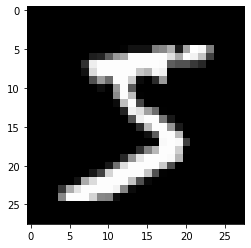

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0],cmap='gray')

In [5]:
print(train_target[0])

5


In [9]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.utils import np_utils
train_target=np_utils.to_categorical(train_target)
test_target=np_utils.to_categorical(test_target)

In [11]:
print(train_target[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [13]:
model.fit(train_data,train_target,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0568 - accuracy: 0.9839 - val_loss: 0.1360 - val_accuracy: 0.9691
Epoch 2/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0579 - accuracy: 0.9841 - val_loss: 0.1315 - val_accuracy: 0.9718
Epoch 3/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0526 - accuracy: 0.9859 - val_loss: 0.1293 - val_accuracy: 0.9732
Epoch 4/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0527 - accuracy: 0.9859 - val_loss: 0.1467 - val_accuracy: 0.9723
Epoch 5/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0459 - accuracy: 0.9882 - val_loss: 0.1532 - val_accuracy: 0.9711
Epoch 6/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0469 - accuracy: 0.9880 - val_loss: 0.1428 - val_accuracy: 0.9726
Epoch 7/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0441 - accuracy: 0.9897 - val_loss: 0.2052 -

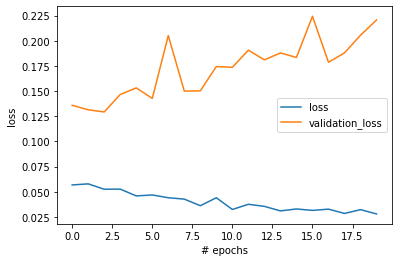

In [20]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='validation_loss')
plt.legend()
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()
#visualizing the loss

Text(0, 0.5, 'accuracy')

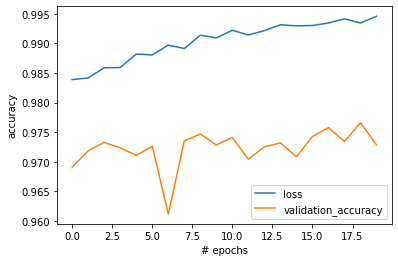

In [21]:
plt.plot(model.history.history['accuracy'],label='loss')
plt.plot(model.history.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.xlabel('# epochs')
plt.ylabel('accuracy')
#visualizing the accuracy

In [27]:
print(model.evaluate(test_data,test_target))

313/313 [==============================] - 3s 9ms/step - loss: 0.1916 - accuracy: 0.9746
[0.19159367680549622, 0.9746000170707703]


In [28]:
model.save_weights('FNN-MNIST.h5')